In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train = pd.read_csv('./Data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("./Data/test.csv")

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
# Getting Training Data
y = train["label"]
g = sns.countplot(y)
x_train = train.drop(labels = ["label"], axis = 1)

In [6]:
# Checking for Null Values
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# Normalisation
x_train = x_train/255.0
test = test/255.0

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [9]:
# Label Encoding
y = to_categorical(y, num_classes = 10)


In [10]:
# Split Train and Validation for Fitting
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y, test_size=0.1,random_state=2)

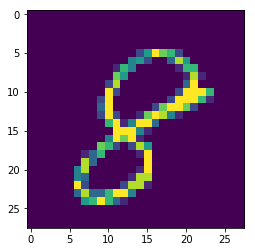

In [12]:
g = plt.imshow(X_train[0][:,:,0])
plt.show()

In [13]:
# Building an CNN Model
model = Sequential()

In [14]:
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))

In [15]:
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))

In [16]:
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

In [19]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
# Define the optimizer
optimizer = RMSprop(lr = 0.001, epsilon = 1e-08, rho = 0.9, decay=0.0)

In [23]:
#Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', verbose = 1, patience = 3, factor = 0.5, min_lr = 0.00001)

In [26]:
epochs = 30
batch_size = 86

In [27]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)

In [28]:
datagen.fit(X_train)

In [30]:
# Model Without Data Augmentation
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, Y_test), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 251s - loss: 0.0554 - acc: 0.9833 - val_loss: 0.0508 - val_acc: 0.9857
Epoch 2/30
 - 246s - loss: 0.0357 - acc: 0.9892 - val_loss: 0.0571 - val_acc: 0.9850
Epoch 3/30
 - 239s - loss: 0.0277 - acc: 0.9918 - val_loss: 0.0463 - val_acc: 0.9895
Epoch 4/30
 - 242s - loss: 0.0211 - acc: 0.9934 - val_loss: 0.0397 - val_acc: 0.9905
Epoch 5/30
 - 244s - loss: 0.0171 - acc: 0.9952 - val_loss: 0.0382 - val_acc: 0.9917
Epoch 6/30
 - 242s - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0420 - val_acc: 0.9921
Epoch 7/30
 - 241s - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0371 - val_acc: 0.9914
Epoch 8/30
 - 256s - loss: 0.0130 - acc: 0.9968 - val_loss: 0.0502 - val_acc: 0.9900
Epoch 9/30
 - 282s - loss: 0.0094 - acc: 0.9977 - val_loss: 0.0514 - val_acc: 0.9912
Epoch 10/30
 - 274s - loss: 0.0095 - acc: 0.9974 - val_loss: 0.0698 - val_acc: 0.9929
Epoch 11/30
 - 235s - loss: 0.0097 - acc: 0.9976 - val_loss: 0.0554 - val_acc: 0.9914
Epoch 12/30
 -

In [45]:
history1 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, validation_data=(X_test, Y_test), verbose = 2, steps_per_epoch=X_train.shape[0]//batch_size, callbacks=[learning_rate_reduction])

Epoch 1/30
 - 299s - loss: 0.0242 - acc: 0.9928 - val_loss: 0.0237 - val_acc: 0.9950
Epoch 2/30
 - 278s - loss: 0.0288 - acc: 0.9921 - val_loss: 0.0191 - val_acc: 0.9936
Epoch 3/30
 - 300s - loss: 0.0286 - acc: 0.9926 - val_loss: 0.0225 - val_acc: 0.9943
Epoch 4/30
 - 316s - loss: 0.0257 - acc: 0.9931 - val_loss: 0.0239 - val_acc: 0.9950
Epoch 5/30
 - 288s - loss: 0.0279 - acc: 0.9920 - val_loss: 0.0222 - val_acc: 0.9938

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/30
 - 293s - loss: 0.0217 - acc: 0.9938 - val_loss: 0.0202 - val_acc: 0.9945
Epoch 7/30
 - 289s - loss: 0.0225 - acc: 0.9938 - val_loss: 0.0201 - val_acc: 0.9936
Epoch 8/30
 - 289s - loss: 0.0217 - acc: 0.9939 - val_loss: 0.0242 - val_acc: 0.9931

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 9/30
 - 279s - loss: 0.0173 - acc: 0.9947 - val_loss: 0.0303 - val_acc: 0.9940
Epoch 10/30
 - 280s - loss: 0.0171 - acc: 0.9949 - val_loss: 0.0207 - val

In [46]:
# Plot the loss and accuracy of the curves for training and validation
fig, ax = plt.subplots(2, 1)
ax[0].plot(history1.history['loss'], color = 'b', label = 'Training Loss')
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow = "True")
ax[1].plot(history1.history['acc'], color = 'b', label = "Training Accuracy")
ax[1].plot(history1.history['val_acc'], color = 'r', label = "Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

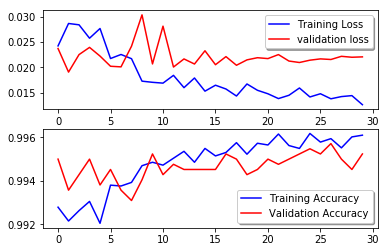

In [47]:
plt.show()

In [48]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)


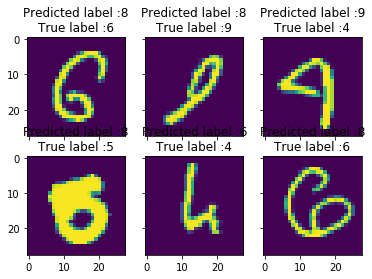

In [49]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_test[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.show()

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [50]:
# Prediction 
prediction = model.predict(test)
results = np.argmax(prediction, axis = 1)
results = pd.Series(data = results, name = 'Labels')